In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("processed data/data.csv")

In [18]:
df = df[["Date", "tv", "pbr"]]
df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
df.diff()

,Date,tv,pbr
0,NaT,NaN,NaN
1,1 days,0.31,-0.180000
2,1 days,-0.05,-0.500000
3,1 days,-0.26,-0.080000
4,3 days,-0.35,0.350000
...,...,...,...
246,1 days,-0.02,-0.050000
247,1 days,0.06,0.780000
248,1 days,0.24,0.379999
249,3 days,0.02,0.110001


## Lets visulise data

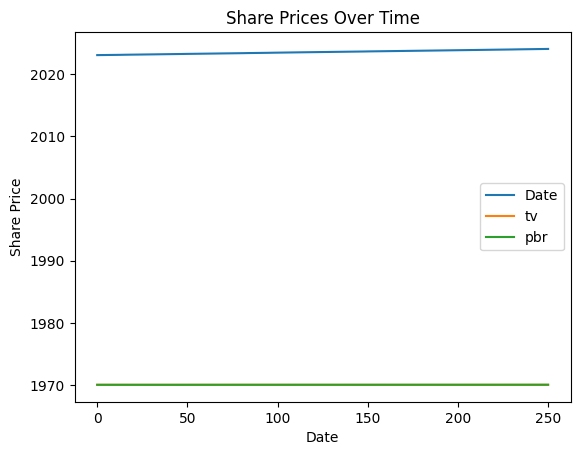

In [19]:
# Plotting
df.plot()
plt.title('Share Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Share Price')
plt.legend()
plt.show()

In [20]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(list(df["tv"]), list(df["pbr"]))

print(f'Pearson Correlation Coefficient: {correlation}')
print(f'P-value: {p_value}')

Pearson Correlation Coefficient: -0.771036792649609
P-value: 1.024048946162528e-50


In [12]:
# Import the necessary library
from scipy.stats import spearmanr

# Calculate Spearman's Rank Correlation
correlation, p_value = spearmanr(list(df["tv"]), list(df["pbr"]))

print(f'Spearman\'s Rank Correlation: {correlation}')
print(f'P-value: {p_value}')


Spearman's Rank Correlation: -0.7531212287538104
P-value: 3.4997988291888304e-47


In [14]:
# Import the necessary library
from scipy.stats import kendalltau

# Define two sets of data
# Replace these with your actual datasets
data1 = [10, 20, 30, 40, 50]
data2 = [12, 24, 33, 45, 57]

# Calculate Kendall Tau Correlation
correlation, p_value = kendalltau(list(df["tv"]), list(df["pbr"]))

print(f'Kendall Tau Correlation: {correlation}')
print(f'P-value: {p_value}')


Kendall Tau Correlation: -0.52381597921911
P-value: 6.554669298028649e-35


In [17]:
from statsmodels.tsa.api import ExponentialSmoothing
from scipy.stats import pearsonr
import numpy as np

# Sample data: Replace these with your actual datasets
data1 = np.array([10, 20, 30, 40, 50])
data2 = np.array([12, 24, 33, 45, 57])

# Apply exponential smoothing to both datasets
# The smoothing_level (alpha) is set to 0.2 for both, but you can adjust this value
smoothed_data1 = ExponentialSmoothing(data1).fit(smoothing_level=0.2, optimized=False).fittedvalues
smoothed_data2 = ExponentialSmoothing(data2).fit(smoothing_level=0.2, optimized=False).fittedvalues

# Calculate Pearson correlation on the smoothed data
correlation, p_value = pearsonr(smoothed_data1, smoothed_data2)

print(f'Pearson Correlation Coefficient (on smoothed data): {correlation}')
print(f'P-value: {p_value}')


Pearson Correlation Coefficient (on smoothed data): 0.9998188884547634
P-value: 2.925777277062998e-06


In [18]:
import pandas as pd
import numpy as np


# Calculate rolling correlation
window_size = 30  # Define the rolling window size
rolling_corr = df['tv'].rolling(window=window_size).corr(df['pbr'])

# Display the rolling correlation
print(rolling_corr)


Date
2023-01-31         NaN
2023-02-01         NaN
2023-02-02         NaN
2023-02-03         NaN
2023-02-06         NaN
                ...   
2024-01-24   -0.172320
2024-01-25   -0.190178
2024-01-26   -0.200419
2024-01-29   -0.127868
2024-01-30   -0.059973
Length: 251, dtype: float64
